# Solar Panel 
Installers typically recomment a 6 kWh system per $100 in monthly Electric utility bill.

A 6 kWh system would include approximately 20x black panels @ 300W each

In [3]:
import math
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
% matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 10

from DataframeHelper import load_dataframe, avg_month, annual_costs

In [2]:
df = load_dataframe()
df.head()

,date,dollars,kwh,rangeEnd,rangeStart,temp_avg,temp_unit,month_int,avg_cost_per_kwh,days,avg_kwh_per_day,avg_kw_per_hour,radiation_hours_per_day,kwh_demand
0,2012-12-01,69.62,692.0,2012-12-26,2012-11-26,45.1,F,12.0,0.100607,30.0,23.066667,0.961111,3.599606,6.408109
1,2013-01-01,65.49,651.0,2013-01-24,2012-12-26,37.2,F,1.0,0.100599,29.0,22.448276,0.935345,3.749815,5.986501
2,2013-02-01,62.98,626.0,2013-02-21,2013-01-24,42.1,F,2.0,0.100607,28.0,22.357143,0.931548,4.482554,4.987590
3,2013-03-01,60.46,601.0,2013-03-22,2013-02-21,51.2,F,3.0,0.100599,29.0,20.724138,0.863506,5.199177,3.986042
4,2013-04-01,76.76,763.0,2013-04-25,2013-03-22,58.3,F,4.0,0.100603,34.0,22.441176,0.935049,6.137713,3.656276


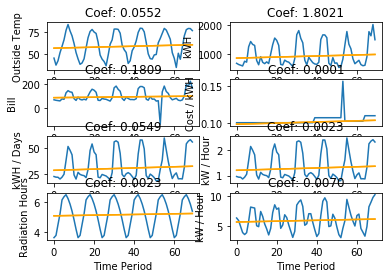

In [4]:
f, ax = plt.subplots(4, 2)

def sub_plot(_df, _ax, column, y_label, title = 'Historical Energy Consumption'):
    _df[column].plot(ax=_ax)
    X = np.array(np.repeat(df.index.values, 2)).reshape(-1, 2)
    lr = Ridge()
    lr.fit(X, df[column])
    _ax.plot(df.index, lr.coef_ * X + lr.intercept_, color='orange')
    _ax.set_ylabel(y_label)
    _ax.set_xlabel('Time Period')
    _ax.set_title('Coef: {:.4f}'.format(lr.coef_[0]))
    
sub_plot(df, ax[0,0], 'temp_avg', 'Outside Temp')
sub_plot(df, ax[0,1], 'kwh', 'kWH')

sub_plot(df, ax[1,0], 'dollars', 'Bill')
sub_plot(df, ax[1,1], 'avg_cost_per_kwh', 'Cost / kWH')

sub_plot(df, ax[2,0], 'avg_kwh_per_day', 'kWH / Days')
sub_plot(df, ax[2,1], 'avg_kw_per_hour', 'kW / Hour')

sub_plot(df, ax[3,0], 'radiation_hours_per_day', 'Radiation Hours')
sub_plot(df, ax[3,1], 'kwh_demand', 'kW / Hour')

plt.show()

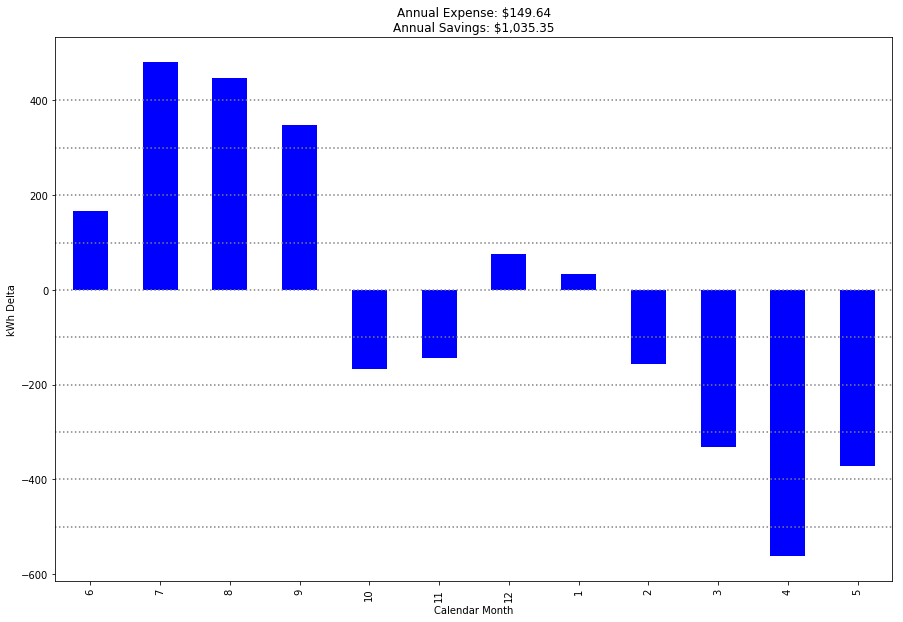

In [5]:
m = avg_month(df, solar_system_kwh = 6.32)
annual_expense, annual_credits, annual_savings = annual_costs(m)

column = 'kwh_per_month_delta'
ax = m[column].plot(kind='bar', color='blue')
ax.set_ylabel('kWh Delta')
ax.set_xlabel('Calendar Month')
ax.set_title('Annual Expense: ${:,.2f}\nAnnual Savings: ${:,.2f}'.format(
    annual_expense,
    annual_savings
))
def round_up(x):
    return int(math.ceil(x / 100.)) * 100

for y in range(round_up(m[column].min()), round_up(m[column].max()), 100):
    ax.axhline(y=y, color='gray', linestyle=':')
plt.show()

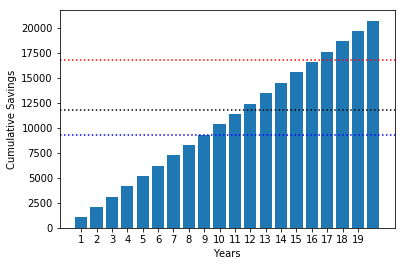

In [7]:
upfront_cost = 16800

f, ax = plt.subplots(1,1)
ax.bar(range(1,21), [x * annual_savings for x in range(1,21)])
# upfront cost
ax.axhline(y=upfront_cost, color='red', linestyle=':')
# sans Tax Credits
ax.axhline(y=upfront_cost - (upfront_cost * .3), color='black', linestyle=':')
# sans Duke Rebate
# https://www.duke-energy.com/home/products/renewable-energy/nc-solar-rebates
ax.axhline(y=upfront_cost - (upfront_cost * .3) - 2500, color='blue', linestyle=':')
ax.set_ylabel('Cumulative Savings')
ax.set_xlabel('Years')
ax.set_xticks(range(1,20))
plt.show()

[Working with plotly offline](https://plot.ly/python/offline/)

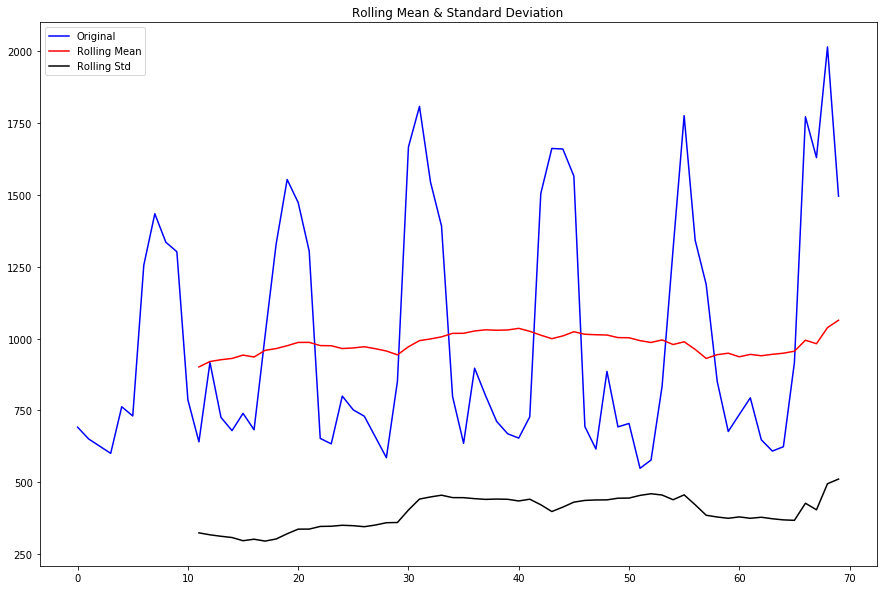

Results of Dickey-Fuller Test:
Test Statistic                 -2.335055
p-value                         0.160911
#Lags Used                     10.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


In [149]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window=12):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

test_stationarity(df['kwh'])

In [ ]:
ts_log = np.log(ts)